In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
X,y = make_classification(n_features=5,n_redundant=0,n_informative=5,
                         n_clusters_per_class=1)

In [4]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
df.shape

(100, 6)

In [5]:
bag = BaggingClassifier(max_features=2)

In [6]:
bag.fit(df.iloc[:,:-1],df.iloc[:,-1])

BaggingClassifier(max_features=2)

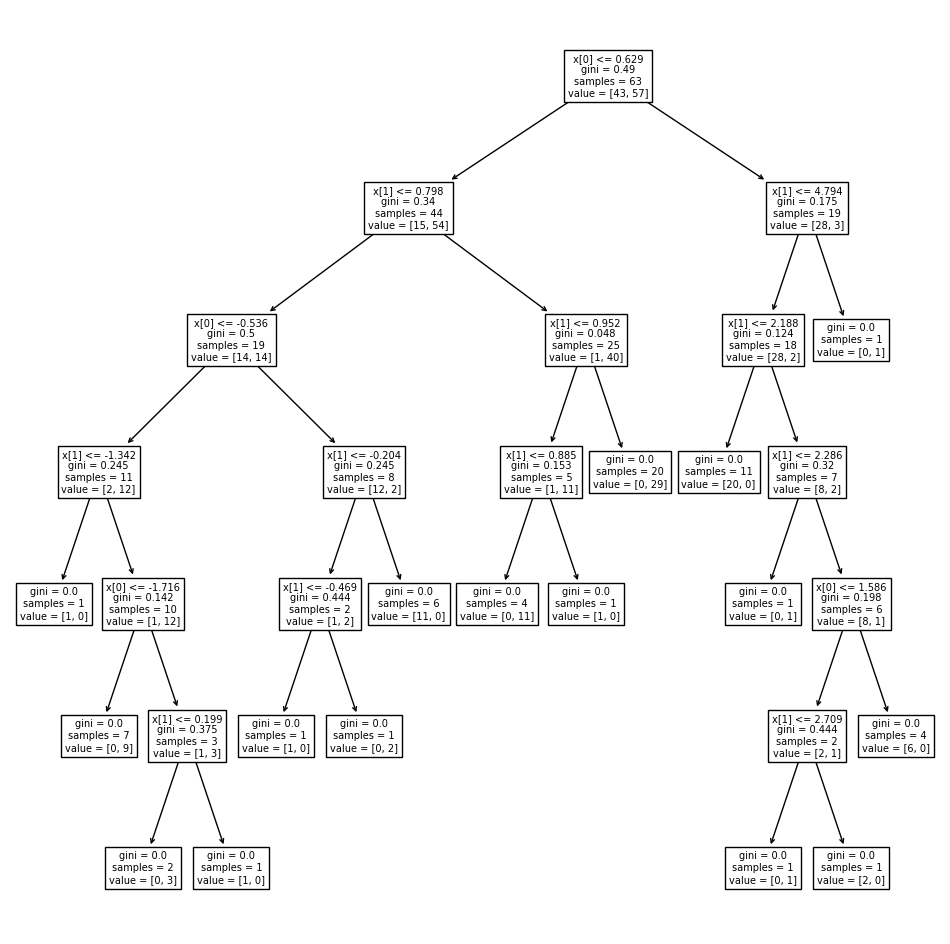

In [20]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

In [21]:
rf = RandomForestClassifier(max_features=2)

In [22]:
rf.fit(df.iloc[:,:-1],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

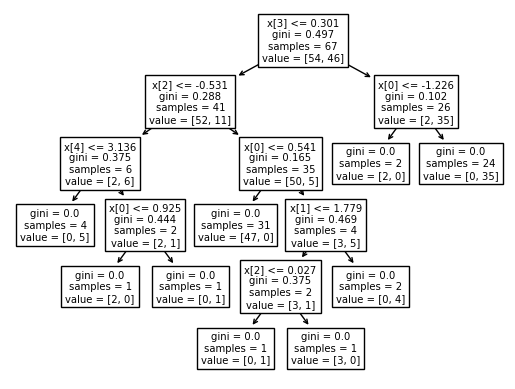

In [24]:
plot_tree(rf.estimators_[0])
plt.show()

In [25]:
rf.estimators_[0]

DecisionTreeClassifier(max_features=2, random_state=259192544)

 # day65-random-forest

In [56]:
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [29]:
df = pd.read_csv(r"C:\Users\U6056186\Downloads\heart.csv")

In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [31]:
df.shape


(1025, 14)

In [33]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [34]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [84]:
X.iloc[:,1]

0       1
1       1
2       1
3       1
4       0
       ..
1020    1
1021    1
1022    1
1023    0
1024    1
Name: sex, Length: 1025, dtype: int64

In [77]:
X.shape

(1025, 13)

In [78]:
y.shape

(1025,)

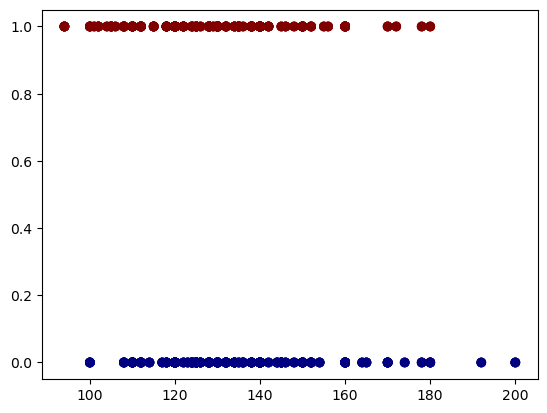

In [91]:
plt.scatter(X.iloc[:,3],y,c=y, cmap='jet')

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
rf = RandomForestClassifier()
gb =GradientBoostingClassifier()
svr = SVC()
lr = LogisticRegression()

In [49]:
rf.fit(X_train,y_train)
gb.fit(X_train,y_train)
svr.fit(X_train,y_train)
lr.fit(X_train,y_train)

C:\Users\U6056186\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
rypred =rf.predict(X_test)
gypred =gb.predict(X_test)
sypred =svr.predict(X_test)
lpred= lr.predict(X_test)

In [72]:
print('rf=',accuracy_score(y_test,rypred),'\n'
      'gb=',accuracy_score(y_test,gypred),'\n',
      'sv=',accuracy_score(y_test,sypred),'\n',
      'lr=',accuracy_score(y_test,lpred))

rf= 0.9853658536585366 
gb= 0.9317073170731708 
 sv= 0.6829268292682927 
 lr= 0.7804878048780488


In [101]:
print('AFTER CV RF=',(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy')).mean())

AFTER CV RF= 0.9941462021701885


In [ ]:
RandomForestClassifier()

In [64]:
param_grid= {'n_estimators':[5,10,20,60,100,120],
             'max_features': [0.2,0.6,0.3,0.8,1.0],
             'max_depth':[2,8,None],
             'max_samples':[0.3,0.4,0.5,0.75,1.0]
            }

RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

In [65]:
print(param_grid)

{'n_estimators': [5, 10, 20, 60, 100, 120], 'max_features': [0.2, 0.6, 0.3, 0.8, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.3, 0.4, 0.5, 0.75, 1.0]}


In [66]:
rf2 = RandomForestClassifier()

In [67]:
rf_grid = GridSearchCV(rf2,param_grid=param_grid,cv=5,n_jobs=-1)

In [68]:
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 0.3, 0.8, 1.0],
                         'max_samples': [0.3, 0.4, 0.5, 0.75, 1.0],
                         'n_estimators': [5, 10, 20, 60, 100, 120]})

In [63]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.3,
 'max_samples': 1.0,
 'n_estimators': 20}

In [69]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 0.75,
 'n_estimators': 100}

In [70]:
rf_grid.best_score_

0.9829268292682928